# Data Requirements and Data Collection

### In the From Problem to Approach Lab, we determined that automating the process of determining the cuisine of a given recipe or dish is potentially possible using the ingredients of the recipe or the dish. In order to build a model, we need extensive data of different cuisines and recipes

In [1]:
import pandas as pd
import numpy as np
import re
import random
pd.set_option('display.max_columns', None)
recipes = pd.read_csv('recipes.csv')
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [24]:
recipes.shape

(57394, 384)

### Check these ingredients: rice, soy sauce, wasabi, fish or vegetables in the list

In [ ]:
ingredients = list(recipes.columns.values)
for ingredient in ingredients:
    for match in [(re.compile(".*(rice).*")).search(ingredient)]:
        if match:
            print(match.group(0))
            break
    for match in [(re.compile('.*(wasabi).*')).search(ingredient)]:
        if match:
            print(match.group(0))
            break
    for match in [(re.compile('.*(soy).*')).search(ingredient)]:
        if match:
            print(match.group(0))
            break

### Look at the data to see if it needs cleaning - show frequency table

In [ ]:
pd.set_option('display.max_rows', None)
recipes['country'].value_counts()

### Some problems:
1. Cuisine names are not consistent as not all them start with uppercase first letter.
2. Some cuisine names are duplicated as variation of country name.
3. Some cuisines have very few recipes.

*Fix the column names*

In [2]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names
# print(recipes)

*check any name in cuisine is uppercase or not*

In [ ]:
upper_names = []
for name in column_names:
    if name.isupper():
        upper_names.append(name)
# print(upper_names)

*Make all the cuisine names are lower case*

In [3]:
recipes["cuisine"] = recipes["cuisine"].str.lower()
#pd.set_option("display.max_rows", None)
recipes["cuisine"].value_counts()

american        40150
italian          1789
mexico           1768
italy            1461
asian            1193
                ...  
indonesia          12
belgium            11
east-african       11
israel              9
bangladesh          4
Name: cuisine, Length: 64, dtype: int64

*Make the cuisine names consistent*

In [4]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"
# print(recipes)

### Remove cuisines < 50 recipes

In [5]:
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
recipes_indices = recipes_counts > 50
recipes_to_keep = list(np.array(recipes_counts.index.values)[np.array(recipes_indices)])

In [6]:
# number of rows for origin data
rows_before = recipes.shape[0]
print("The original number of rows: ", rows_before)
# filter the data with recipes > 50
recipes = recipes.loc[recipes["cuisine"].isin(recipes_to_keep)]
# number of rows after processing data
rows_after = recipes.shape[0]
print("The processed number of rows: ", rows_after)

The original number of rows:  57691
The processed number of rows:  57394


In [7]:
# Convert all 'Yes' to 1 and "No" to 0
recipes = recipes.replace(to_replace='Yes', value=1)
recipes = recipes.replace(to_replace="No", value=0)
# recipes.head()

### Check the recipes include: soy, rice, seaweed, wasabi

In [ ]:
check_recipes = recipes.loc[(recipes["rice"] == 1) & (recipes["soy_sauce"] == 1) & (recipes["seaweed"] == 1) & (recipes["wasabi"] == 1)]
# print(check_recipes)

### Count the ingredients across all recipes

In [ ]:
ing = recipes.iloc[:, 1:].sum(axis=0)
print(ing)

In [ ]:
# define each column as a Data Series
# list of ingredient names
ingredient_list = pd.Series(ing.index.values, index=np.arange(len(ing)))
# list of sum for each ingredient
counts = pd.Series(list(ing), index=np.arange(len(ing)))
# create the DataFrame
ing_df = pd.DataFrame(dict(ingredient = ingredient_list, count = counts))
ing_df = ing_df[["ingredient", "count"]]
#print(ing_df.to_string())

### Sort this new DataFrame in descending order

In [ ]:
ing_df.sort_values(by=["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)
print(ing_df)

### Create a profile for each cuisine (try to find out what ingredients Chinese people typically use,...)

In [ ]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

### Print out the profile for each cuisine by displaying the top 4 ingredients in each cuisine

In [ ]:
num_ingredients = 4
# define a function to print the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]
    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines DataFrame
create_cuisine_profiles = cuisines.apply(print_top_ingredients, axis=1)

### Download and install more dependencies and libraries for decision tree

In [8]:
# import decision tree scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

import itertools
import pydot

In [ ]:
# check the data again
recipes.head()

### Build a decision tree using the data pertaining to the Asian and Indian cuisines

In [ ]:
asian_indian_cuisines = recipes[recipes["cuisine"].isin(["korean", "thai", "chinese", "japanese", "indian"])]
cuisines = asian_indian_cuisines["cuisine"]
ingredients = asian_indian_cuisines.iloc[:, 1:]
bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)
print("Decision tree model saved to bamboo_tree!")

### Plot the decision tree

In [ ]:
export_graphviz(bamboo_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

### Build the decision tree using data pertaining to some European cuisines

In [ ]:
european_recipes = recipes[recipes["cuisine"].isin(["belgian", "italian", "french", "swiss"])]
european_cuisines = european_recipes["cuisine"]
european_ingredients = european_recipes.iloc[:, 1:]
european_tree = tree.DecisionTreeClassifier(max_depth=3)
european_tree.fit(european_ingredients, european_cuisines)
print("Decision tree model saved in european_tree")

In [ ]:
export_graphviz(european_tree, feature_names=list(european_ingredients.columns.values), 
                out_file="european_tree.dot", class_names=np.unique(european_cuisines),
                filled=True, label="all", leaves_parallel=False, impurity=False,
                node_ids=True, special_characters=True)
with open("european_tree.dot") as european_tree_image:
    european_tree_graph = european_tree_image.read()
graphviz.Source(european_tree_graph)

### Create new DataFrame using the data pertaining to Asian and Indian cuisines

In [9]:
bamboo = recipes[recipes["cuisine"].isin(["japanese", "korean", "chinese", "thai", "indian"])]

In [10]:
# how many recipes exist in each cuisine
bamboo["cuisine"].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

### Remove 30 recipes from each cuisine to create test set

In [11]:
sample_n = 30
random.seed(1234)
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))
bamboo_test_cuisines = bamboo_test["cuisine"]
bamboo_test_ingredients = bamboo_test.iloc[:, 1:]

bamboo_test["cuisine"].value_counts()

chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: cuisine, dtype: int64

### Create training set by removing bamboo_test from bamboo dataset.

In [12]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]
bamboo_train_cuisines = bamboo_train["cuisine"]
bamboo_train_ingredients = bamboo_train.iloc[:, 1:]
bamboo_train["cuisine"].value_counts()

korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: cuisine, dtype: int64

### Build the decision tree using bamboo_train data set

In [13]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)
print("Decision tree model saved to bamboo_train_tree")

Decision tree model saved to bamboo_train_tree


In [ ]:
export_graphviz(bamboo_train_tree, feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot", filled=True, node_ids=True,
                class_names=np.unique(bamboo_train_cuisines), special_characters=True,
                label="all", impurity=False, leaves_parallel=False)
with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

### Test the above model on the test data

In [14]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

### To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, we will create a confusion matrix which presents a nice summary on how many recipes on each cuisine are
### correctly classified. It also sheds some light on what cuisines are being confused with what the other cuisines.

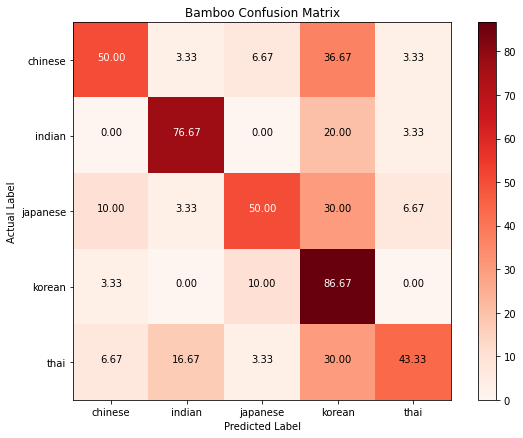

In [29]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(y_true=bamboo_test_cuisines, y_pred=bamboo_pred_cuisines, labels=test_cuisines)
title = "Bamboo Confusion Matrix"

cmap = plt.cm.Reds
plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (bamboo_confusion_matrix.astype("float") / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100

plt.imshow(bamboo_confusion_matrix, interpolation="nearest", cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = ".2f"
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt), horizontalalignment="center", color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.show()